In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
recent_date

('2017-08-23',)

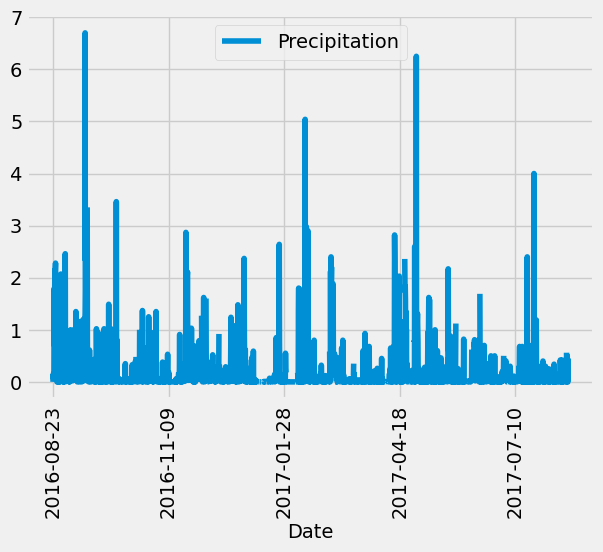

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = recent_date - dt.timedelta(days = 365)
previous_year

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
df.plot()
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
total_station_count = session.query(Station).count()
total_station_count

9

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [37]:
#Find the most active station from the active stations list
most_active_station = active_stations[0][0] 
most_active_station

'USC00519281'

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
temperature_data

[(54.0, 85.0, 71.66378066378067)]

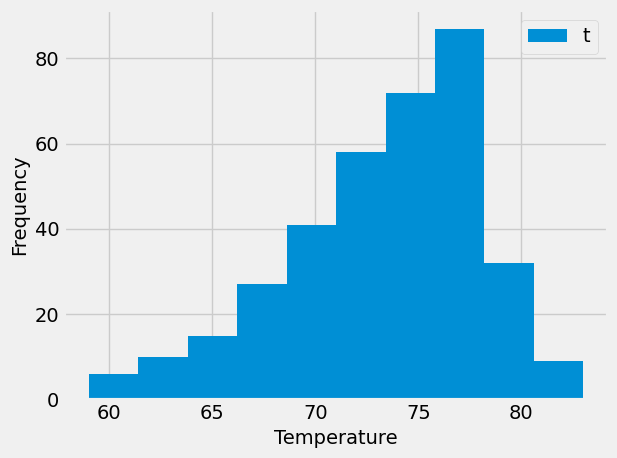

In [70]:
# Using the most active station id
#Find the most recent date of recorded data 
active_station_recent_date = session.query(Measurement.date).\
    filter(Measurement.station == most_active_station).\
    order_by(desc(Measurement.date)).first()

most_recent_station_date = dt.datetime.strptime(active_station_recent_date[0], "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
active_station_previous_year = most_recent_station_date - dt.timedelta(days = 365)

# Query the last 12 months of temperature observation data for this station
previous_year_temp_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station, Measurement.date >= active_station_previous_year).\
    order_by(Measurement.date).all()

# Get the temperature values
temperatures = [temp[0] for temp in previous_year_temp_data]

# Plot the results as a histogram
plt.hist(temperatures)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.tight_layout()
plt.show()

# Close Session

In [73]:
# Close Session
session.close()